In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TS1niacLXvvWTierCKCT")
project = rf.workspace("insectai").project("sahi_test")
version = project.version(2)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 58.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to sahi_test-2 in yolov11:: 100%|██████████| 34/34 [00:00<00:00, 3074.34it/s]


In [2]:

!pip install -q ultralytics roboflow sahi

!pip install -q glob2
import os
from sahi.utils.file import download_from_url
from sahi.utils.ultralytics import download_yolo11n_model
from ultralytics import YOLO
from roboflow import Roboflow
import cv2
import numpy as np
from glob import glob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━

In [3]:
import yaml

# Define hyperparameters for the detector model
hyperparams = { # Replace this dynamically if needed
    'epochs': 200,
    'imgsz': 1504,
    'batch': 2,
    'project': 'binary_detector',
    'max_det': 600,
    'single_cls':True,
    'visualize':True,
    'save_crop':True,
    'show_labels':False,
    'warmup_epochs':20.0,
}

# Save the hyperparameters to a YAML file
with open("cgs.yaml", "w") as file:
  yaml.dump(hyperparams, file)
print("Hyperparameters saved to 'cgs.yaml'.")

Hyperparameters saved to 'cgs.yaml'.


In [4]:
model = YOLO('/content/best (3) (1).pt')

In [9]:
from sahi import AutoDetectionModel

detection_model = AutoDetectionModel.from_pretrained(
    model_type="ultralytics",
    model_path="/content/best (3) (1).pt",
    confidence_threshold=0.45,  # <- filter early
    device="cuda:0",
)


In [6]:
from sahi.predict import get_sliced_prediction

result = get_sliced_prediction(
    "/content/sahi_test-2/test/images/3_jpg.rf.8a65ed5c68ca787a0aeeb61212038105.jpg",
    detection_model,
    slice_height=512,
    slice_width=512,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

Performing prediction on 20 slices.


In [19]:
print(result)

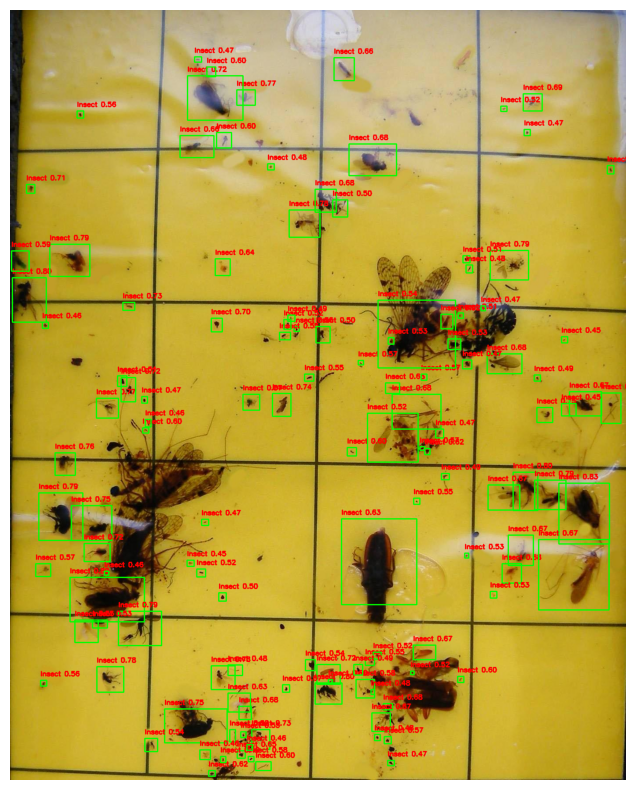

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load image
image_path = "/content/sahi_test-2/test/images/3_jpg.rf.8a65ed5c68ca787a0aeeb61212038105.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw each prediction
for pred in result.object_prediction_list:
    x1, y1, x2, y2 = map(int, pred.bbox.to_xyxy())
    label = pred.category.name
    confidence = pred.score.value

    # Draw rectangle
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Put label text
    cv2.putText(image, f"{label} {confidence:.2f}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Show image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()
